<a href="https://colab.research.google.com/github/cuaiswarya/Machine-Learning/blob/main/EO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/EO.csv")

In [ ]:
df.head()

,Lon,Lat,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17,Band 18,Band 19,Band 20,Band 21,Band 22,Band 23,Band 24,Band 25,Band 26,Band 27,Band 28,Band 29,Band 30,Band 31,Band 32,Band 33,Band 34,Band 35,Band 36,Band 37,PM2.5
0,77.316,28.647,0.090883,0.083848,0.093156,0.091905,0.092790,0.094652,0.095766,0.102050,0.104160,0.105550,0.105420,0.108030,0.109350,0.114890,0.117810,0.120200,0.127090,0.127580,0.130540,0.131650,0.133670,0.141510,0.141820,0.139360,0.148560,0.154360,0.156760,0.157320,0.159170,0.154280,0.152640,0.158650,0.158630,0.162010,0.159170,0.162220,30.111
1,77.182,28.695,0.031495,0.029313,0.027970,0.037324,0.043107,0.043305,0.044099,0.040635,0.047395,0.045655,0.043793,0.049332,0.049973,0.057862,0.060761,0.071168,0.081956,0.084581,0.090272,0.090852,0.086183,0.086763,0.084062,0.074342,0.079179,0.078080,0.075502,0.077195,0.075410,0.070756,0.067414,0.069688,0.070100,0.072587,0.079835,0.101300,27.000
2,77.051,28.776,0.013993,0.007401,0.008331,0.015229,0.025208,0.028733,0.023560,0.021820,0.024094,0.027771,0.024903,0.027955,0.028153,0.034470,0.033219,0.039948,0.048356,0.052522,0.054154,0.055589,0.055680,0.055634,0.053391,0.047166,0.051698,0.051087,0.048875,0.050401,0.049638,0.045975,0.039643,0.043610,0.042496,0.044099,0.051759,0.074968,78.889
3,77.274,28.551,0.038437,0.034668,0.035813,0.027420,0.027146,0.035203,0.035477,0.034653,0.032670,0.035218,0.035630,0.035981,0.034257,0.040314,0.043336,0.048219,0.054017,0.057084,0.060136,0.060609,0.057053,0.058793,0.056214,0.053880,0.058656,0.059190,0.057145,0.058259,0.058549,0.055451,0.051774,0.053147,0.053056,0.055955,0.064256,0.085344,29.348
4,77.227,28.657,0.082719,0.074464,0.081239,0.083482,0.088746,0.089982,0.093370,0.093568,0.099443,0.100360,0.100740,0.102860,0.104140,0.111310,0.108480,0.115310,0.121720,0.123930,0.125580,0.128050,0.131500,0.140430,0.140990,0.136400,0.147830,0.150420,0.151110,0.152790,0.153630,0.147740,0.146880,0.152640,0.152610,0.153440,0.154070,0.160390,24.500


In [ ]:
df.shape

(4090, 39)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Lon      4090 non-null   float64
 1   Lat      4090 non-null   float64
 2   Band 2   4090 non-null   float64
 3   Band 3   4090 non-null   float64
 4   Band 4   4090 non-null   float64
 5   Band 5   4090 non-null   float64
 6   Band 6   4090 non-null   float64
 7   Band 7   4090 non-null   float64
 8   Band 8   4090 non-null   float64
 9   Band 9   4090 non-null   float64
 10  Band 10  4090 non-null   float64
 11  Band 11  4090 non-null   float64
 12  Band 12  4090 non-null   float64
 13  Band 13  4090 non-null   float64
 14  Band 14  4090 non-null   float64
 15  Band 15  4090 non-null   float64
 16  Band 16  4090 non-null   float64
 17  Band 17  4090 non-null   float64
 18  Band 18  4090 non-null   float64
 19  Band 19  4090 non-null   float64
 20  Band 20  4090 non-null   float64
 21  Band 21  4090 

In [ ]:
df.describe()

,Lon,Lat,Band 2,Band 3,Band 4,Band 5,Band 6,Band 7,Band 8,Band 9,Band 10,Band 11,Band 12,Band 13,Band 14,Band 15,Band 16,Band 17,Band 18,Band 19,Band 20,Band 21,Band 22,Band 23,Band 24,Band 25,Band 26,Band 27,Band 28,Band 29,Band 30,Band 31,Band 32,Band 33,Band 34,Band 35,Band 36,Band 37,PM2.5
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,77.193528,28.632084,0.044530,0.040157,0.042903,0.044219,0.049258,0.051393,0.052292,0.051251,0.052860,0.056600,0.054494,0.058087,0.058923,0.064813,0.065386,0.072229,0.078727,0.081828,0.085947,0.086835,0.086994,0.090896,0.090007,0.085170,0.092539,0.094751,0.093432,0.095526,0.096101,0.091616,0.088440,0.092755,0.092741,0.094825,0.099804,0.117293,30.528403
std,0.074616,0.067689,0.021620,0.022628,0.024088,0.024075,0.024441,0.025804,0.026327,0.026903,0.028060,0.028655,0.029016,0.029793,0.030090,0.030770,0.029694,0.029567,0.029810,0.029499,0.029969,0.030037,0.031268,0.033592,0.034605,0.034026,0.036372,0.037609,0.038167,0.039096,0.039848,0.039473,0.039372,0.042125,0.042579,0.042247,0.038466,0.032739,12.798978
min,77.031000,28.497000,0.002853,0.000351,0.001129,0.002319,0.004715,0.006683,0.007752,0.003296,0.004883,0.006683,0.003586,0.003906,0.005875,0.012360,0.014252,0.021195,0.027344,0.031037,0.033555,0.032746,0.031434,0.031067,0.027451,0.023835,0.027848,0.027695,0.024018,0.026551,0.026078,0.022019,0.019669,0.018891,0.018708,0.021988,0.033371,0.046387,1.447100
25%,77.146000,28.571000,0.027939,0.021851,0.024125,0.024399,0.029755,0.030304,0.031006,0.029664,0.030701,0.033783,0.030991,0.035142,0.035309,0.040223,0.041810,0.049607,0.056809,0.060014,0.064347,0.064637,0.063565,0.065583,0.064240,0.058457,0.064195,0.065126,0.064179,0.065461,0.065095,0.060838,0.057969,0.060014,0.060105,0.062257,0.070222,0.093019,23.333000
50%,77.200000,28.638000,0.042512,0.037797,0.040223,0.041199,0.045014,0.048035,0.047929,0.047166,0.048646,0.052293,0.050523,0.052964,0.054612,0.060410,0.061021,0.068757,0.074617,0.078309,0.081865,0.082750,0.082078,0.086286,0.086076,0.081636,0.089036,0.091753,0.090486,0.092920,0.093736,0.088396,0.085954,0.089799,0.089693,0.093233,0.095888,0.113590,27.251000
75%,77.250000,28.681000,0.059449,0.055589,0.058518,0.061860,0.067712,0.071260,0.073121,0.071095,0.074189,0.077790,0.075914,0.080278,0.081071,0.087037,0.086076,0.091890,0.097948,0.100570,0.103940,0.105930,0.107300,0.113950,0.114240,0.108450,0.118040,0.121030,0.120470,0.123370,0.124410,0.119890,0.116870,0.123200,0.122970,0.124485,0.125840,0.135520,34.784000
max,77.318000,28.778000,0.163850,0.162260,0.163760,0.157410,0.159500,0.168550,0.170660,0.176390,0.181120,0.187700,0.190830,0.199190,0.206900,0.222320,0.230980,0.248200,0.265710,0.271530,0.273550,0.270920,0.266610,0.271140,0.263650,0.252160,0.267860,0.272010,0.271820,0.280540,0.287560,0.283820,0.287070,0.307500,0.315280,0.322910,0.322390,0.338600,78.889000


In [ ]:
X1 = df.drop(["Lon","Lat","PM2.5"],axis='columns')
y = df['PM2.5'].values

In [ ]:
X1.shape

(4090, 36)

In [ ]:
#p = sns.pairplot(X1)

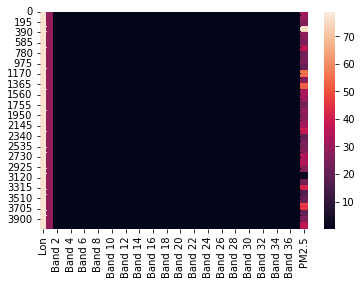

In [ ]:
corr = df.corr()
sns.heatmap(df)

Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state = 0)

In [ ]:
#X_train, X_rem, y_train, y_rem = train_test_split(X1,y, train_size=0.7)

In [ ]:
#test_size = 0.5
#X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)
print(regr.intercept_)

34.75178449990214


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 8.32373031840134
Mean Squared Error: 141.8354860801709
Root Mean Squared Error: 11.909470436596704


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.12249191000836357

In [ ]:
sse = np.sum((y_pred - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('R square obtain for normal equation method is :',R_square)

R square obtain for normal equation method is : 0.12249191000836357


In [ ]:
#pd.set_option("display.max_rows",None)

In [ ]:
X2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
X2

,Actual,Predicted
0,23.333,29.563391
1,33.224,27.169346
2,21.991,30.722149
3,42.515,40.359564
4,37.778,28.141261
...,...,...
813,24.550,24.193419
814,27.250,27.504041
815,26.012,26.612234
816,57.664,28.527528


In [ ]:
X3 = X2.copy()

In [ ]:
X3.to_csv('actual_predicted.csv')
!cp actual_predicted.csv "drive/My Drive/"

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
kf =KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
cnt=1
for train_index, test_index in kf.split(X1, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 3681, Test set:409
Fold:2, Train set: 3681, Test set:409
Fold:3, Train set: 3681, Test set:409
Fold:4, Train set: 3681, Test set:409
Fold:5, Train set: 3681, Test set:409
Fold:6, Train set: 3681, Test set:409
Fold:7, Train set: 3681, Test set:409
Fold:8, Train set: 3681, Test set:409
Fold:9, Train set: 3681, Test set:409
Fold:10, Train set: 3681, Test set:409


In [ ]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [ ]:
score = cross_val_score(linear_model.LinearRegression(), X_train, y_train, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-156.80281929 -135.03746685 -106.63136136 -171.64174133 -127.8357958
 -145.82770327 -163.42551213 -127.69293501 -143.51909083 -117.75198132]
rmse= 11.82


In [ ]:
scores = cross_val_score(regr, X_train, y_train, scoring='r2', cv=10)
scores  
print("Mean_Acc : ", scores.mean())

Mean_Acc :  0.1484165962345873


Random Forest

In [ ]:
X1 = df.drop(["Lon","Lat","PM2.5"],axis='columns')
y = df['PM2.5'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train) 
y_pred_rf = regressor.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_rf))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

Mean Absolute Error: 0.3974477823961136
Mean Squared Error: 8.110995392670898
Root Mean Squared Error: 2.8479809326382255


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_rf)


0.9515336388565645

In [ ]:
X_r = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
X_r

,Actual,Predicted
0,26.008,26.00800
1,22.786,22.78600
2,35.129,35.12900
3,20.684,20.68400
4,27.321,27.32100
...,...,...
813,32.722,32.72200
814,24.507,24.96165
815,27.250,27.16724
816,58.009,58.00900


In [ ]:
X_rf = X_r.copy()
X_rf.to_csv('act_predrf.csv')
!cp actual_predicted.csv "drive/My Drive/"

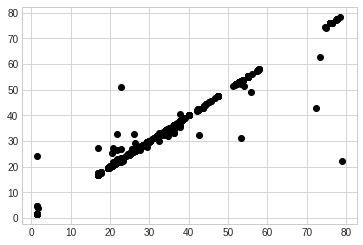

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.plot(y_test, y_pred_rf, 'o', color='black');

In [ ]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X_train, y_train, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [ -5.49577886  -1.13786816  -1.72808972 -11.6858958   -0.63093308
  -2.89352717  -4.3055801   -5.92462213  -7.44176023  -6.27001102]
rmse= 2.18


In [ ]:
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=10)
scores  
print("Mean_Acc : ", scores.mean())

Mean_Acc :  0.968920726500278


SVR

In [ ]:
X1 = df.drop(["Lon","Lat","PM2.5"],axis='columns')
y = df['PM2.5'].values
y = y.reshape(len(y),1)

In [ ]:
y.shape

(4090, 1)

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
sc_X1 = StandardScaler()
sc_y = StandardScaler()
X = sc_X1.fit_transform(X1)
#y = np.squeeze(sc_y.fit_transform(y.reshape(-1, 1)))
y = sc_y.fit_transform(y)

In [ ]:
svr=SVR(kernel = 'rbf') 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [ ]:
svr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
#y_pred_svr = svr.predict(X_test)    
#sc_y.inverse_transform(svr.predict(sc_X1.transform(X_test)))

In [ ]:
y_pred_svr = svr.predict(X_test)   
y_pred_sv = y_pred_svr.copy()
y_pred_sv = y_pred_sv.reshape(-1,1)
y_pred_sv = sc_y.inverse_transform(y_pred_sv)
print(y_pred_sv)

[[32.33738558]
 [25.45892555]
 [19.3613497 ]
 [28.99743274]
 [31.0655332 ]
 [30.19993611]
 [28.83346033]
 [26.35663128]
 [26.40383762]
 [32.17046696]
 [29.78372289]
 [25.82897565]
 [28.96976439]
 [25.82897565]
 [29.21692814]
 [27.73031491]
 [30.55376223]
 [28.20164567]
 [24.1291746 ]
 [27.35497047]
 [27.1084716 ]
 [31.24433706]
 [28.38206642]
 [31.07444376]
 [40.14194882]
 [31.1062106 ]
 [22.04860564]
 [27.60271927]
 [25.55316347]
 [31.1062106 ]
 [25.26066252]
 [28.85611004]
 [30.19993611]
 [28.52701228]
 [28.06821988]
 [26.71432163]
 [30.52630955]
 [29.80649995]
 [25.01868955]
 [25.04999413]
 [27.60088274]
 [26.42213682]
 [27.94112069]
 [26.70846029]
 [20.09450016]
 [30.12805595]
 [26.35316964]
 [32.83441333]
 [33.09676687]
 [27.81698966]
 [28.17275985]
 [31.87520302]
 [35.17164374]
 [31.62012789]
 [28.34369245]
 [29.78393182]
 [28.08063152]
 [28.00199038]
 [26.13631276]
 [28.42945896]
 [26.78470767]
 [27.90697245]
 [28.20968817]
 [29.3389272 ]
 [28.38764068]
 [31.00599195]
 [24.44959

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_svr))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_svr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)))

Mean Absolute Error: 0.5847136888696193
Mean Squared Error: 0.8388650710629422
Root Mean Squared Error: 0.9158957752184155


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_svr)

0.15003175988940687

In [ ]:
y_pred_svr = y_pred_svr.flatten()
y_test = y_test.flatten()

In [ ]:
X_sv= pd.DataFrame({"Actual": y_test, "Predicted": y_pred_svr})
X_sv

,Actual,Predicted
0,-0.562255,0.141355
1,0.210636,-0.396133
2,-0.667119,-0.872602
3,0.936642,-0.119631
4,0.566489,0.041972
...,...,...
813,-0.467157,-0.217478
814,-0.256177,-0.268978
815,-0.352915,-0.266312
816,2.120397,-0.265342


In [ ]:
X_svr = X_sv.copy()
X_svr.to_csv('act_predsvr.csv')
!cp actual_predicted.csv "drive/My Drive/"

In [ ]:
from sklearn.model_selection import KFold
kfold=KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
linear_svr=SVR(kernel='linear')
linear_scores = cross_val_score(linear_svr, X_train, y_train, cv=kfold)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
print('Stratified cross-validation scores with linear kernel:\n\n{}'.format(linear_scores))


Stratified cross-validation scores with linear kernel:

[0.07758965 0.09235914 0.11547636 0.09409645 0.13535347 0.09199763
 0.13772488 0.06057158 0.087087   0.09154504]


In [ ]:
print('Average stratified cross-validation score with linear kernel:{:.4f}'.format(linear_scores.mean()))


Average stratified cross-validation score with linear kernel:0.0984


Gradient Boost

In [ ]:
X1 = df.drop(["Lon","Lat","PM2.5"],axis='columns')
y = df['PM2.5'].values

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)

In [ ]:
GBmodel = GradientBoostingRegressor(min_samples_leaf= 4, learning_rate= 0.1, max_depth= 4)
GBmodel.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=4)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


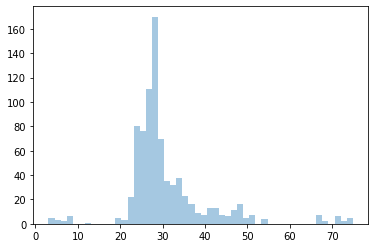

In [ ]:
sns.distplot(GBmodel.predict(X_test),kde=None)

In [ ]:
y_pred_gb = GBmodel.predict(X_test)

In [ ]:
print(GBmodel.score(X_test, y_test))

0.8661186964683817


In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_gb))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_gb)

Mean Absolute Error: 3.167494907219021
Mean Squared Error: 22.405450099626673
Root Mean Squared Error: 4.733439563322497


0.8661186964683817

In [ ]:
X_g= pd.DataFrame({"Actual": y_test, "Predicted": y_pred_gb})
X_g

,Actual,Predicted
0,26.008,26.194087
1,22.786,25.635059
2,35.129,34.585565
3,20.684,24.542848
4,27.321,27.445184
...,...,...
813,32.722,30.813876
814,24.507,28.254377
815,27.250,30.014901
816,58.009,54.572543


In [ ]:
X_gb = X_g.copy()
X_gb.to_csv('act_predgb.csv')
!cp actual_predicted.csv "drive/My Drive/"

In [ ]:
from sklearn.model_selection import cross_val_score
GB_accuracies = cross_val_score(estimator = GBmodel, X = X_train, y = y_train, scoring='r2', cv = 10)
print("Mean_GB_Acc : ", GB_accuracies.mean())

Mean_GB_Acc :  0.8717937911521794


XGBoost Regressor

In [ ]:
X1 = df.drop(["Lon","Lat","PM2.5"],axis='columns')
y = df['PM2.5'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
reg = XGBRegressor()

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 #"min_child_weight": [4,5], 
 #"eta"             : [i/10.0 for i in range(3,6)]   
}

In [ ]:
n_iter_search = 100
random_search=RandomizedSearchCV(reg,param_distributions=params,n_iter=n_iter_search,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
#random_search.fit(X_train,y_train)

In [ ]:
import time

start = time.time()
random_search.fit(X_train,y_train)
print("RandomizedSearchCV took % seconds % candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  category=UserWarning,


[11:36:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RandomizedSearchCV took 248.0644679069519econds dandidates parameter settings.


In [ ]:
best_regressor = random_search.best_estimator_
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.3,
 'learning_rate': 0.25,
 'max_depth': 15,
 'min_child_weight': 7}

In [ ]:
y_pred_xg = best_regressor.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_xg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_xg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xg)))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_xg)

Mean Absolute Error: 0.21039655066469173
Mean Squared Error: 2.3954958329561933
Root Mean Squared Error: 1.5477389421204706


0.9856560026773228

In [ ]:
from sklearn.model_selection import cross_val_score
XG_accuracies = cross_val_score(estimator = reg, X = X_train, y = y_train, scoring='r2', cv = 10)
print("Mean_XG_Acc : ", XG_accuracies.mean())

[11:39:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:39:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:39:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:39:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:39:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
X_x= pd.DataFrame({"Actual": y_test, "Predicted": y_pred_xg})
X_x

,Actual,Predicted
0,21.778,21.761976
1,40.188,40.156120
2,16.842,16.897602
3,51.448,51.454800
4,27.146,27.085854
...,...,...
813,32.524,32.387894
814,19.447,19.442789
815,76.111,76.072899
816,47.444,47.404987


In [ ]:
X_xg = X_x.copy()
X_xg.to_csv('act_predxg.csv')
!cp actual_predicted.csv "drive/My Drive/"

cp: cannot stat 'actual_predicted.csv': No such file or directory


KNN

In [ ]:
X1 = df.drop(["Lon","Lat","PM2.5"],axis='columns')
y = df['PM2.5'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
score = []
for k in range(1,20):   # running for different K values to know which yields the max accuracy. 
    knn = KNeighborsRegressor(n_neighbors = k,  weights = 'distance', p=1)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test ))   

In [ ]:
k_max = score.index(max(score))+1
print( "At K = {}, Max Accuracy = {}".format(k_max, max(score)*100))

At K = 19, Max Accuracy = 98.57029256725399


In [ ]:
knn = KNeighborsRegressor(n_neighbors = k_max,  weights = 'distance', p=1)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test ))   
y_pred_knn = knn.predict(X_test)

0.9857029256725399


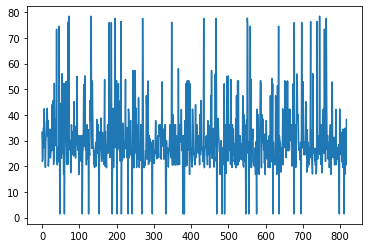

In [ ]:
_ = plt.plot(y_pred_knn)

In [ ]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_knn)

Mean Absolute Error: 0.23527230527664433
Mean Squared Error: 2.380155694540459
Root Mean Squared Error: 1.5427753221193483


0.9857029256725399

In [ ]:
X_kn= pd.DataFrame({"Actual": y_test, "Predicted": y_pred_knn})
X_kn

,Actual,Predicted
0,33.266,33.2660
1,21.899,21.8990
2,22.765,22.7663
3,29.351,29.3510
4,35.129,35.1290
...,...,...
813,34.808,34.8080
814,17.010,17.0100
815,30.118,30.1180
816,20.556,20.5560


In [ ]:
X_knn = X_kn.copy()
X_knn.to_csv('act_predknn.csv')
!cp actual_predicted.csv "drive/My Drive/"

In [ ]:
from sklearn.model_selection import cross_val_score
knn_accuracies = cross_val_score(estimator = knn, X = X_train, y = y_train, scoring = 'r2', cv = 10)
print("Mean_KNN_Acc : ", knn_accuracies.mean())

Mean_KNN_Acc :  0.975611819192993
